**Import modules**

In [0]:
import numpy as np
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import time

**Check for CUDA**

In [95]:
use_cuda = True # True if you want to use CUDA otherwise False

cuda_available = False
device = torch.cuda.get_device_name(0)

if use_cuda and torch.cuda.is_available():
  cuda_available = True
  print('CUDA is available')
else:
  print('CUDA not available')

CUDA is available


**Download data & transform**

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('MNIST_data/',  download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/',  download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)

images, labels = dataiter.next()

**Define Neural Network**

In [97]:
input_size = 784
hidden_size = [400, 200, 100]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[0], hidden_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[1], hidden_size[2]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[2], output_size),
                     nn.Softmax(dim=1))

print(model)

if cuda_available:
  model = model.cuda()
  print('model is cuda')

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
  (7): Softmax()
)
model is cuda


**Training Neural Network**


1.   Define loss criteria
2.   Define optimizer
3.   Forward step
4.   Calculate loss
5.   Calculate new weights using optimizer
6.   Backwardprop
7.   Step to update weights



In [0]:
criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [113]:
epochs = 3
print_every = 400
steps = 0

for e in range(epochs):
  running_loss = 0
  start_time = time.time()
  
  for images, labels in trainloader:
    
    if cuda_available:
      images = images.cuda()
      labels = labels.cuda()
          
    images.resize_(images.shape[0], 784)
    
    optimizer.zero_grad()
    
    steps += 1

    output = model.forward(images)
    loss = criteria(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
    if steps % print_every == 0:
      print("steps: {} - loss: {}".format(steps, loss))
  
  end_time = time.time()
  print("\n===============\n")
  print("epoch: {} - loss: {} - took: {}".format(e,running_loss/print_every, (end_time - start_time)))
  print("\n===============\n")
    

steps: 400 - loss: 1.67527437210083
steps: 800 - loss: 1.769188404083252


epoch: 0 - loss: 3.9463603854179383 - took: 13.626747608184814


steps: 1200 - loss: 1.730025053024292
steps: 1600 - loss: 1.686057448387146


epoch: 1 - loss: 3.8980573853850364 - took: 13.877206802368164


steps: 2000 - loss: 1.6500204801559448
steps: 2400 - loss: 1.615277886390686
steps: 2800 - loss: 1.5766783952713013


epoch: 2 - loss: 3.869787351191044 - took: 13.95775580406189




**Test model prediction**

In [0]:
def predict(image):
  img = image.view(1, 784)

  logits = model.forward(img)
  ps = F.softmax(logits, dim=1)
  print('Prediction: {}'.format(ps.argmax()))

  a = TF.to_pil_image(image.cpu())
  plt.imshow(a)

Prediction: 0


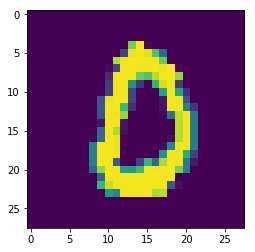

In [121]:
images, labels = next(iter(testloader))
if cuda_available:
  images = images.cuda()
  labels = labels.cuda()
      
index = 8

predict(images[index])
